# **Capstone project: Providing data-driven suggestions for HR**

## Description and deliverables

This capstone project is an opportunity for you to analyze a dataset and build predictive models that can provide insights to the Human Resources (HR) department of a large consulting firm.

Upon completion, you will have two artifacts that you would be able to present to future employers. One is a brief one-page summary of this project that you would present to external stakeholders as the data professional in Salifort Motors. The other is a complete code notebook provided here. Please consider your prior course work and select one way to achieve this given project question. Either use a regression model or machine learning model to predict whether or not an employee will leave the company. The exemplar following this actiivty shows both approaches, but you only need to do one.

In your deliverables, you will include the model evaluation (and interpretation if applicable), a data visualization(s) of your choice that is directly related to the question you ask, ethical considerations, and the resources you used to troubleshoot and find answers or solutions.


# **PACE stages**


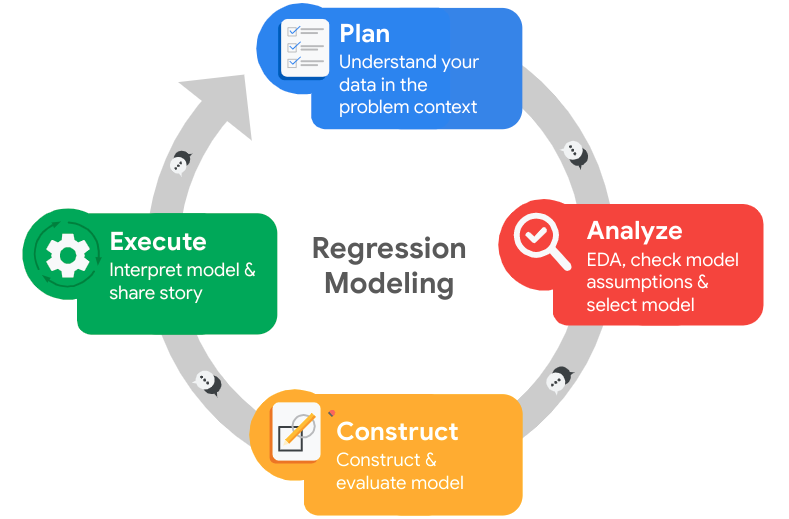

## **Pace: Plan**

Consider the questions in your PACE Strategy Document to reflect on the Plan stage.

In this stage, consider the following:

### Understand the business scenario and problem

The HR department at Salifort Motors wants to take some initiatives to improve employee satisfaction levels at the company. They collected data from employees, but now they don’t know what to do with it. They refer to you as a data analytics professional and ask you to provide data-driven suggestions based on your understanding of the data. They have the following question: what’s likely to make the employee leave the company?

Your goals in this project are to analyze the data collected by the HR department and to build a model that predicts whether or not an employee will leave the company.

If you can predict employees likely to quit, it might be possible to identify factors that contribute to their leaving. Because it is time-consuming and expensive to find, interview, and hire new employees, increasing employee retention will be beneficial to the company.

### Familiarize yourself with the HR dataset

The dataset that you'll be using in this lab contains 15,000 rows and 10 columns for the variables listed below. 

**Note:** you don't need to download any data to complete this lab. For more information about the data, refer to its source on [Kaggle](https://www.kaggle.com/datasets/mfaisalqureshi/hr-analytics-and-job-prediction?select=HR_comma_sep.csv).

Variable  |Description |
-----|-----|
satisfaction_level|Employee-reported job satisfaction level [0&ndash;1]|
last_evaluation|Score of employee's last performance review [0&ndash;1]|
number_project|Number of projects employee contributes to|
average_monthly_hours|Average number of hours employee worked per month|
time_spend_company|How long the employee has been with the company (years)
Work_accident|Whether or not the employee experienced an accident while at work
left|Whether or not the employee left the company
promotion_last_5years|Whether or not the employee was promoted in the last 5 years
Department|The employee's department
salary|The employee's salary (U.S. dollars)

💭
### Reflect on these questions as you complete the plan stage.

*  Who are your stakeholders for this project?
- What are you trying to solve or accomplish?
- What are your initial observations when you explore the data?
- What resources do you find yourself using as you complete this stage? (Make sure to include the links.)
- Do you have any ethical considerations in this stage?

* Who are your stakeholders for this project? (HR Department at Salifort Motors)
- What are you trying to solve or accomplish? (Analyze HR data to understand factors affecting employee turnover and build a predictive model.)
- What are your initial observations when you explore the data? (Consider data size, key variables, and the target variable.)
- What resources do you find yourself using as you complete this stage? (Kaggle dataset,courses and tutorials.)
- Do you have any ethical considerations in this stage? (Privacy, bias, transparency.)

## Step 1. Imports

*   Import packages
*   Load dataset



### Import packages

In [1]:
# Import packages
import numpy as np
import pandas as pd

### YOUR CODE HERE ###
import seaborn as sns
from matplotlib import pyplot as plt

# Load in sci-kit learn functions for constructing logistic regression
from sklearn.model_selection import train_test_split, GridSearchCV, PredefinedSplit
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.ensemble import RandomForestClassifier

# Import the metrics module from scikit-learn
import sklearn.metrics as metrics 


### Load dataset

`Pandas` is used to read a dataset called **`HR_capstone_dataset.csv`.**  As shown in this cell, the dataset has been automatically loaded in for you. You do not need to download the .csv file, or provide more code, in order to access the dataset and proceed with this lab. Please continue with this activity by completing the following instructions.

In [2]:
# RUN THIS CELL TO IMPORT YOUR DATA. 

# Load dataset into a dataframe
df = pd.read_csv("../dataset/HR_capstone_dataset.csv")

# Display first few rows of the dataframe
df.head(10)


,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years,Department,salary
0,0.38,0.53,2,157,3,0,1,0,sales,low
1,0.80,0.86,5,262,6,0,1,0,sales,medium
2,0.11,0.88,7,272,4,0,1,0,sales,medium
3,0.72,0.87,5,223,5,0,1,0,sales,low
4,0.37,0.52,2,159,3,0,1,0,sales,low
5,0.41,0.50,2,153,3,0,1,0,sales,low
6,0.10,0.77,6,247,4,0,1,0,sales,low
7,0.92,0.85,5,259,5,0,1,0,sales,low
8,0.89,1.00,5,224,5,0,1,0,sales,low
9,0.42,0.53,2,142,3,0,1,0,sales,low


## Step 2. Data Exploration (Initial EDA and data cleaning)

- Understand your variables
- Clean your dataset (missing data, redundant data, outliers)



### Gather basic information about the data

In [3]:
# Gather basic information about the data
df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14999 entries, 0 to 14998
Data columns (total 10 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   satisfaction_level     14999 non-null  float64
 1   last_evaluation        14999 non-null  float64
 2   number_project         14999 non-null  int64  
 3   average_montly_hours   14999 non-null  int64  
 4   time_spend_company     14999 non-null  int64  
 5   Work_accident          14999 non-null  int64  
 6   left                   14999 non-null  int64  
 7   promotion_last_5years  14999 non-null  int64  
 8   Department             14999 non-null  object 
 9   salary                 14999 non-null  object 
dtypes: float64(2), int64(6), object(2)
memory usage: 1.1+ MB


### Gather descriptive statistics about the data

In [4]:
# Gather descriptive statistics about the data
df.describe()


,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years
count,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000
mean,0.612834,0.716102,3.803054,201.050337,3.498233,0.144610,0.238083,0.021268
std,0.248631,0.171169,1.232592,49.943099,1.460136,0.351719,0.425924,0.144281
min,0.090000,0.360000,2.000000,96.000000,2.000000,0.000000,0.000000,0.000000
25%,0.440000,0.560000,3.000000,156.000000,3.000000,0.000000,0.000000,0.000000
50%,0.640000,0.720000,4.000000,200.000000,3.000000,0.000000,0.000000,0.000000
75%,0.820000,0.870000,5.000000,245.000000,4.000000,0.000000,0.000000,0.000000
max,1.000000,1.000000,7.000000,310.000000,10.000000,1.000000,1.000000,1.000000


### Rename columns

As a data cleaning step, rename the columns as needed. Standardize the column names so that they are all in `snake_case`, correct any column names that are misspelled, and make column names more concise as needed.

In [5]:
# Display all column names
df.columns


Index(['satisfaction_level', 'last_evaluation', 'number_project',
       'average_montly_hours', 'time_spend_company', 'Work_accident', 'left',
       'promotion_last_5years', 'Department', 'salary'],
      dtype='object')

In [6]:
# Rename columns as needed
df.rename(columns={'Work_accident': 'work_accident',
                   'Department':'department',
                   'average_montly_hours':'average_monthly_hours',
                   'time_spend_company':'tenure'},inplace=True ) 

# Display all column names after the update
df.columns

Index(['satisfaction_level', 'last_evaluation', 'number_project',
       'average_monthly_hours', 'tenure', 'work_accident', 'left',
       'promotion_last_5years', 'department', 'salary'],
      dtype='object')

### Check missing values

Check for any missing values in the data.

In [7]:
# Check for missing values
df.isnull().sum()

satisfaction_level       0
last_evaluation          0
number_project           0
average_monthly_hours    0
tenure                   0
work_accident            0
left                     0
promotion_last_5years    0
department               0
salary                   0
dtype: int64

### Check duplicates

Check for any duplicate entries in the data.

In [8]:
# Check for duplicates
df.duplicated().sum()


3008

In [9]:
# Inspect some rows containing duplicates as needed
df[df.duplicated()].sort_values(by=['satisfaction_level','last_evaluation','number_project',
            'average_monthly_hours','tenure','work_accident','left',
           'promotion_last_5years','department','salary'],ascending = True)      

#duplicate function keep the first row (keep = First) and show the count of the remaining duplicated rows of the same

,satisfaction_level,last_evaluation,number_project,average_monthly_hours,tenure,work_accident,left,promotion_last_5years,department,salary
12030,0.09,0.62,6,294,4,0,1,0,accounting,low
14241,0.09,0.62,6,294,4,0,1,0,accounting,low
12071,0.09,0.77,5,275,4,0,1,0,product_mng,medium
14282,0.09,0.77,5,275,4,0,1,0,product_mng,medium
12652,0.09,0.77,6,290,4,0,1,0,technical,medium
...,...,...,...,...,...,...,...,...,...,...
13283,1.00,0.86,2,264,3,0,0,0,IT,medium
12916,1.00,0.86,4,245,4,0,0,0,sales,medium
13089,1.00,0.88,6,201,4,0,0,0,technical,low
13586,1.00,0.93,5,167,3,0,0,0,sales,medium


In [10]:
# Drop duplicates and save resulting dataframe in a new variable as needed
df1 = df.drop_duplicates(keep='first')
df1.info()

# Display first few rows of new dataframe as needed
df1.head()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 11991 entries, 0 to 11999
Data columns (total 10 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   satisfaction_level     11991 non-null  float64
 1   last_evaluation        11991 non-null  float64
 2   number_project         11991 non-null  int64  
 3   average_monthly_hours  11991 non-null  int64  
 4   tenure                 11991 non-null  int64  
 5   work_accident          11991 non-null  int64  
 6   left                   11991 non-null  int64  
 7   promotion_last_5years  11991 non-null  int64  
 8   department             11991 non-null  object 
 9   salary                 11991 non-null  object 
dtypes: float64(2), int64(6), object(2)
memory usage: 1.0+ MB


,satisfaction_level,last_evaluation,number_project,average_monthly_hours,tenure,work_accident,left,promotion_last_5years,department,salary
0,0.38,0.53,2,157,3,0,1,0,sales,low
1,0.80,0.86,5,262,6,0,1,0,sales,medium
2,0.11,0.88,7,272,4,0,1,0,sales,medium
3,0.72,0.87,5,223,5,0,1,0,sales,low
4,0.37,0.52,2,159,3,0,1,0,sales,low


### Check outliers

Check for outliers in the data.

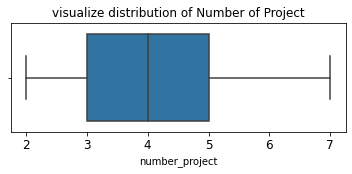

In [11]:
# Create a boxplot to visualize distribution of `number_project` and detect any outliers
plt.figure(figsize=(6,2))
plt.title('visualize distribution of Number of Project', fontsize=12)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
sns.boxplot(x=df1['number_project'])
plt.show()

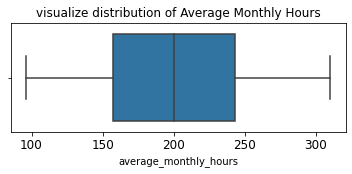

In [12]:
# Create a boxplot to visualize distribution of `average_monthly_hours` and detect any outliers
plt.figure(figsize=(6,2))
plt.title('visualize distribution of Average Monthly Hours', fontsize=12)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
sns.boxplot(x=df1['average_monthly_hours'])
plt.show()

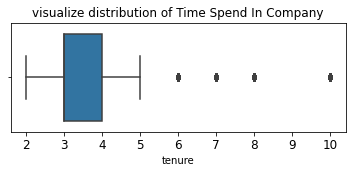

In [13]:
# Create a boxplot to visualize distribution of `tenure` and detect any outliers
plt.figure(figsize=(6,2))
plt.title('visualize distribution of Time Spend In Company', fontsize=12)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
sns.boxplot(x=df1['tenure'])
plt.show()

In [14]:
# Determine the number of rows containing outliers
# Calculate 25th percentile of annual strikes
percentile25 = df1['tenure'].quantile(0.25)

# Calculate 75th percentile of annual strikes
percentile75 = df1['tenure'].quantile(0.75)

# Calculate interquartile range
iqr = percentile75 - percentile25

# Calculate upper and lower thresholds for outliers
upper_limit = percentile75 + 1.5 * iqr
lower_limit = percentile25 - 1.5 * iqr

print('Lower limit is: '+ str(lower_limit))
print('Upper limit is: '+ str(upper_limit))

outliers = df1[(df1['tenure'] < lower_limit) | (df1['tenure'] > upper_limit)]

print('Number of rows containing outlier: ', len(outliers))

Lower limit is: 1.5
Upper limit is: 5.5
Number of rows containing outlier:  824


# Observations: tenure box plot 
- tenure has outliers
- some employees work more than than max numbers of working hours 
- Lower Limit : 1.5
- Upper Limit : 5.5
- There are 824 recording with tenure outliers 

Certain types of models are more sensitive to outliers than others. When you get to the stage of building your model, consider whether to remove outliers, based on the type of model you decide to use.

# pAce: Analyze Stage
- Perform EDA (analyze relationships between variables)



### Reflect on these questions as you complete the analyze stage.

- What did you observe about the relationships between variables?

Employees who leave the company tend to work longer hours than the standard, complete 5 to 7 projects, and typically exhibit a mean satisfaction level of around 0.45. 
    
  
- What do you observe about the distributions in the data?


  **Satisfaction Level:**

The mean satisfaction level is approximately 0.613.
The distribution appears to be relatively symmetric, with values ranging from a minimum of 0.09 to a maximum of 1.00.

  **Last Evaluation:**

The mean last evaluation score is around 0.716.
The distribution seems to be relatively symmetric, with values ranging from 0.36 to 1.00.

  **Number of Projects:**

The mean number of projects is approximately 3.803.
The distribution indicates that most employees are involved in 3 to 5 projects, with a minimum of 2 and a maximum of 7.

  **Average Monthly Hours:**

The mean average monthly hours worked is about 201.05.
The distribution suggests a range of hours worked, with a minimum of 96 hours and a maximum of 310 hours.

  **tenures:**

The mean time spent in the company is around 3.50 years.
The distribution shows most employees having a tenure between 2 to 4 years, with a minimum of 2 years and a maximum of 10 years.
There are 824 records with tenures considered as outliers, falling beyond the defined limits of Lower Limit: 1.5 and Upper Limit: 5.5.

  **Work Accident:**

The distribution of work accidents is binary (0 or 1), indicating whether an employee experienced a work accident.
The mean suggests that work accidents are relatively infrequent, with a mean of approximately 0.145.

  **Left (Employee Turnover):**

The turnover distribution is binary (0 or 1), indicating whether an employee left the company.
The mean implies that turnover is not extremely prevalent, with a mean of approximately 0.238.

  **Promotion in the Last 5 Years:**

The distribution of promotions in the last 5 years is binary (0 or 1), indicating whether an employee was promoted.
The mean suggests that promotions are relatively rare, with a mean of approximately 0.021.

These observations provide a high-level overview of the central tendencies and ranges of the variables in the dataset, aiding in understanding the distributions and characteristics of each feature.





- What transformations did you make with your data? Why did you chose to make those decisions?

**Handling Missing Values:** Imputing or removing missing values to ensure completeness in the dataset but there were no missing values.

**Encoding Categorical Variables:** Converting categorical variables into a numerical format suitable for modeling (like department and salary).
 
**Handling Duplicates:** Duplicates can be handled by either removing them or keeping only the first occurrence and there were 3008 rows which were dropped
 
 
 

- What are some purposes of EDA before constructing a predictive model?


**Identifying Patterns:** EDA uncovers data patterns, aiding in feature selection and model design.

**Handling Missing Data:** EDA guides decisions on managing missing data, ensuring data completeness.

**Feature Engineering:** EDA informs the creation of new features, enhancing model predictability.

**Addressing Outliers:** EDA detects and informs the handling of outliers to prevent model distortion.

**Selecting Appropriate Models:** EDA assists in choosing models aligned with data characteristics.

**Understanding Variable Relationships:** EDA reveals correlations, guiding the selection of influential features.

**Assessing Data Quality:** EDA checks data quality for consistency and potential errors.

**Guiding Model Assumptions:** EDA validates assumptions, ensuring model appropriateness.

**Improving Model Interpretability:** EDA enhances model interpretability through a deeper understanding of variables.

**Enhancing Communication:** EDA results in visuals that facilitate effective communication with stakeholders.



- What resources do you find yourself using as you complete this stage? (Make sure to include the links.)

**Pandas Documentation:**

Pandas Documentation: Essential for data manipulation and exploration.

**Matplotlib and Seaborn Documentation:**

Matplotlib Documentation and Seaborn Documentation: Used for data visualization.

**Stack Overflow:**

Stack Overflow: Valuable for troubleshooting and finding solutions to specific coding challenges.

**Online Courses or Tutorials:**

Google advance data analytics course from Coursera and DataCamp Data Science track.


- Do you have any ethical considerations in this stage?


In the analyze stage, ensure fairness, transparency, and privacy. Detect and mitigate biases, maintain data security, and communicate results accurately. Obtain proper consent and comply with relevant regulations.



## Step 2. Data Exploration (Continue EDA)

Begin by understanding how many employees left and what percentage of all employees this figure represents.

In [15]:
# Get numbers of people who left vs. stayed
print('People who left the Company :', len(df1[df1['left']==1]))
print('People who stayed the Company :',len(df1[df1['left']==0]))

# Get percentages of people who left vs. stayed
print('Percentage of people who left the Company :',round(len(df1[df1['left']==1])/len(df1)*100,2),'%')
print('Percentage of people who stayed the Company :',round(len(df1[df1['left']==0])/len(df1)*100,2),'%')

People who left the Company : 1991
People who stayed the Company : 10000
Percentage of people who left the Company : 16.6 %
Percentage of people who stayed the Company : 83.4 %


### Data visualizations

Now, examine variables that you're interested in, and create plots to visualize relationships between variables in the data.

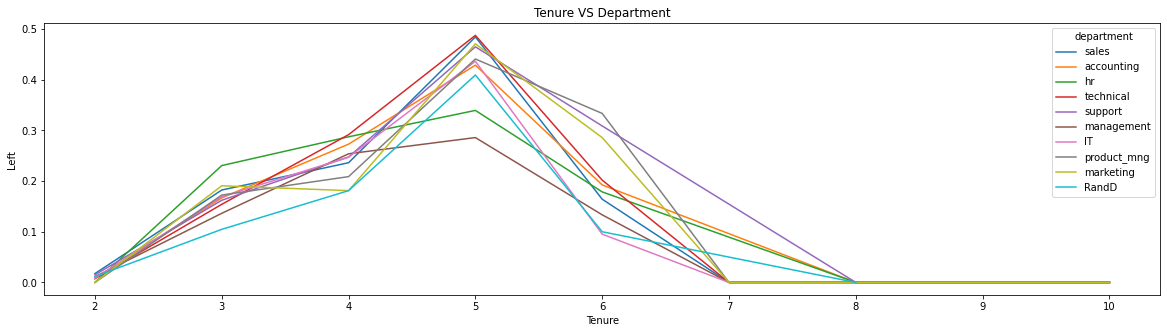

In [16]:
#Create a line plot to illustrate the relationship between tenure and churn across different departments 
fig, ax = plt.subplots(1, 1, figsize = (20,5))

fig = sns.lineplot(data=df1,x=df1['tenure'],y=df1['left'],hue="department",ci=None)
fig.set_xlabel("Tenure")
fig.set_ylabel("Left")
fig.set_title("Tenure VS Department")
plt.show()

# Observation

This illustrates the distribution of departures and retentions across departments based on tenure:

- The fifth year emerges as the predominant tenure for employees with a high departure rate in the company, spanning across all departments.
- Human Resources (HR) and Management exhibit the lowest departure ratios within the company.
- Notably, HR experiences the highest departure ratio in the third year.
- After seven years, employees in the Management department display a tendency to stay, possibly influenced by benefits.

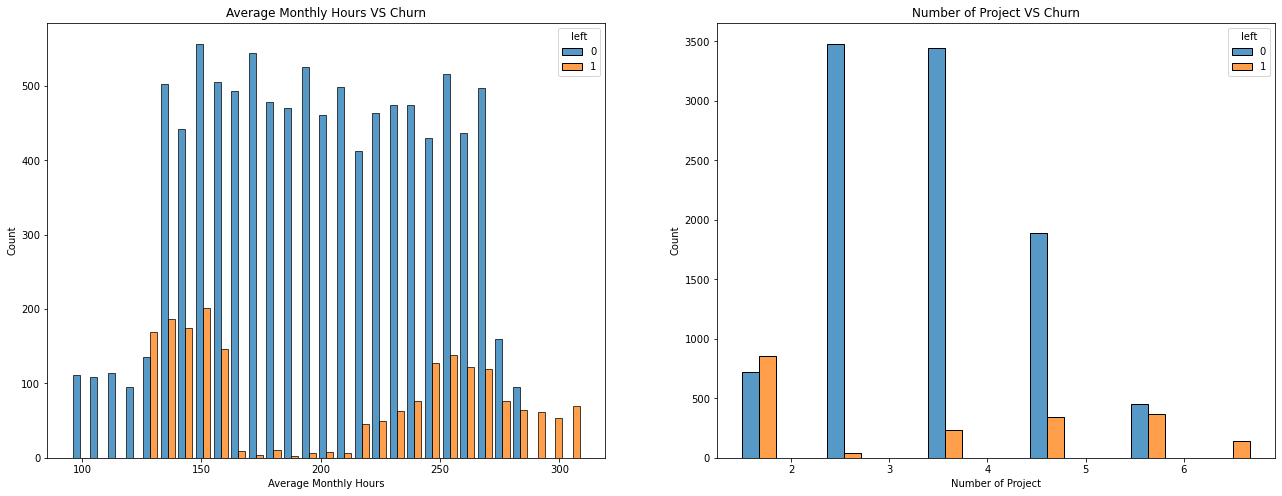

In [17]:
#Create a histogram to depict the correlation between churn and the average number of hours worked per month.
fig, ax = plt.subplots(1, 2, figsize = (22,8))

fig = sns.histplot(data=df1, x="average_monthly_hours", hue="left", multiple="dodge", shrink=0.8,ax=ax[0])
ax[0].set_xlabel("Average Monthly Hours")
ax[0].set_ylabel("Count")
ax[0].set_title("Average Monthly Hours VS Churn")

#Generate a histogram to depict the correlation between churn and the Number of Project.
fig = sns.histplot(data=df1, x="number_project", hue="left", multiple="dodge", shrink=2, ax=ax[1])
ax[1].set_xlabel("Number of Project")
ax[1].set_ylabel("Count")
ax[1].set_title("Number of Project VS Churn")

plt.show()

# Observation
## Average Monthly Hours

- Individuals with approximately 150 hours of work have a higher likelihood of leaving the company. However, there is a notable majority of people who have stayed despite working fewer hours.

- The departure of those with fewer working hours, around 150 hours, could be attributed to either termination for not meeting peer productivity standards or voluntary resignation due to feeling suppressed under such conditions.

- Employees exceeding standard working hours also show a tendency to leave. This could be a result of burnout from extended working hours or termination due to insufficient performance despite prolonged work hours.

## Number of Projects

- Individuals managing 2 projects within the company have departed. This could stem from a perception that handling two projects sufficiently establishes their professional profile, or alternatively, they may have been terminated due to subpar performance in these projects.

- Employees currently engaged in projects and delivering commendable results are not inclined to leave the company.

- The departure rate in relation to the number of projects undertaken is relatively low, indicating that individuals tend to stay when actively involved in project work.

- Specifically, individuals overseeing 7 projects have left the company, suggesting a likelihood that they considered their tenure with the company fulfilled and have moved on to explore new ventures.

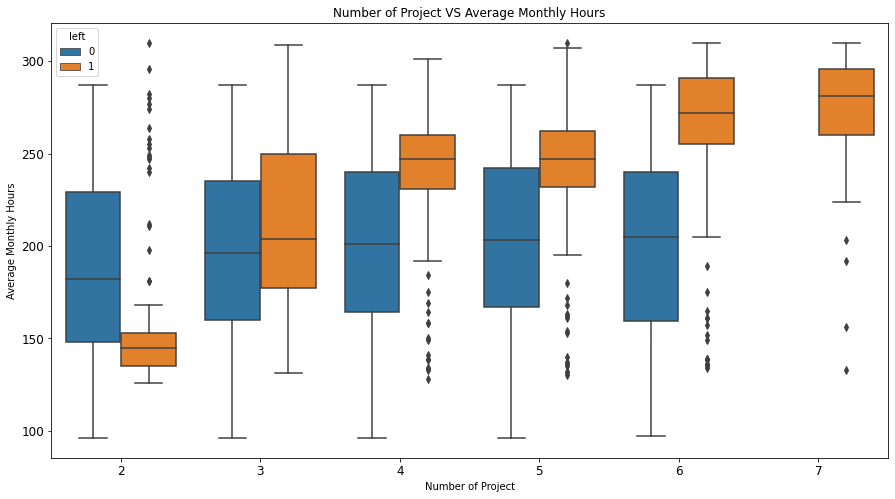

In [18]:
# Create a boxplot showing the distribution between number of project and average monthly hours, considering churn and detect any outliers
plt.figure(figsize=(15,8))

plt.title('Number of Project VS Average Monthly Hours', fontsize=12)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)

sns.boxplot(data=df1, x="number_project", y="average_monthly_hours", hue="left")
plt.xlabel("Number of Project")
plt.ylabel("Average Monthly Hours")

plt.show()

# Observation

- Individuals handling 2 projects show the lowest company departure rate.

- Employees with 7 projects, marked by the highest working hours, have all left the company.

- Those with 3 projects experience an equal rate of departure and retention, with minimal deviation in working hours.

- Employees managing 4 to 6 projects display a higher retention rate, especially considering their relatively lower working hours compared to those who left.

In [19]:
# Get value counts of stayed/left for employees with 7 projects
df1[df1['number_project']==7]['left'].value_counts()

1    145
Name: left, dtype: int64

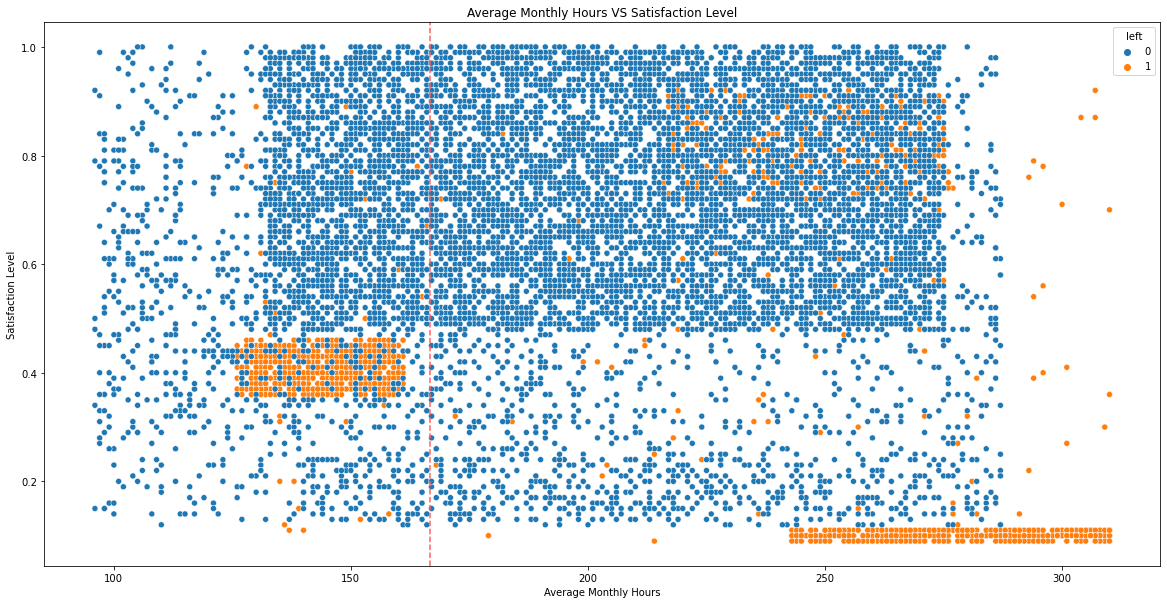

In [20]:
# Create a scatterplot showing the relationship between Average Monthly Hours and Satisfaction Level, considering churn.
plt.figure(figsize = (20, 10))
fig = sns.scatterplot(data=df1, x="average_monthly_hours", y="satisfaction_level", hue="left")
plt.axvline(x=166.67, color='#ff6361', label='166.67 hrs./mo.', ls='--')
fig.set_xlabel("Average Monthly Hours")
fig.set_ylabel("Satisfaction Level")
fig.set_title("Average Monthly Hours VS Satisfaction Level")
plt.show()

# Observation

- Employees with a lower monthly working hours, possibly disengaged due to a lack of interest in ongoing projects or the company culture, exhibit a low satisfaction level and subsequently leave.

- Individuals with the highest monthly working hours demonstrate a low satisfaction level, leading to their departure.

- A minimal number of employees, despite maintaining high satisfaction levels and extended working hours, have left the company.

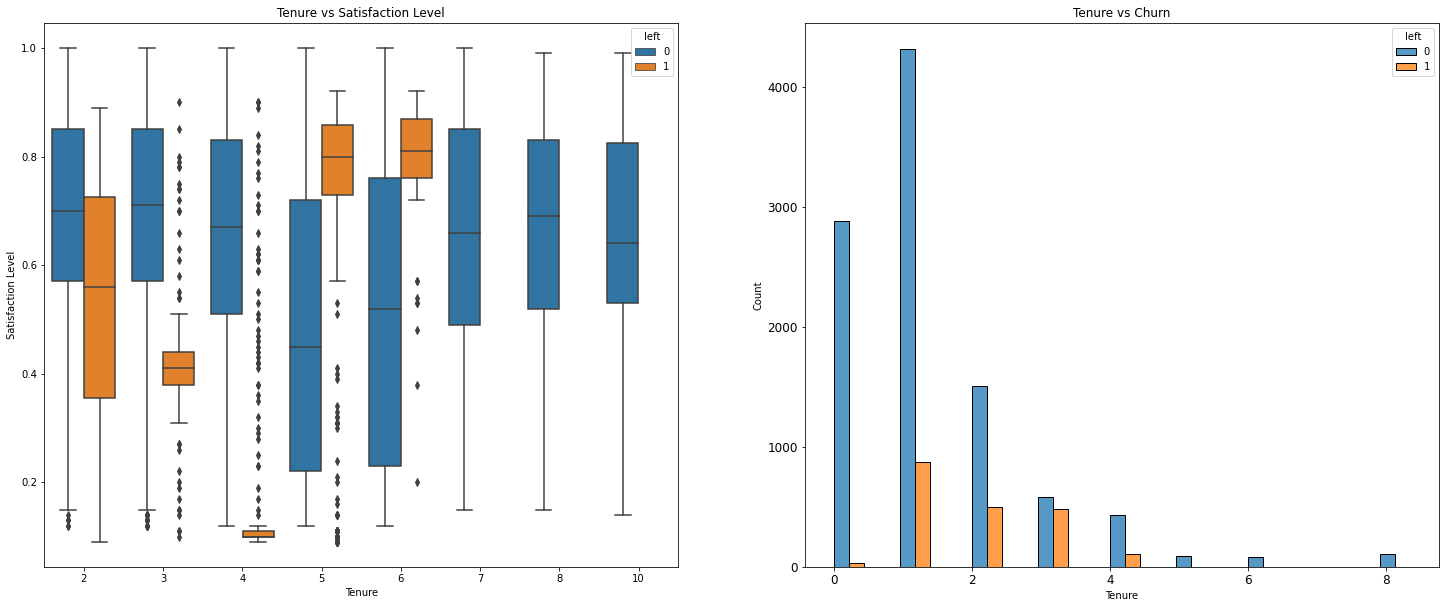

<Figure size 720x360 with 0 Axes>

In [21]:
# Create a boxplot to visualize distribution of `tenure` vs 'sat' considering churn and detect any outliers

fig, ax = plt.subplots(1, 2, figsize = (25,10))


plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
fig = sns.boxplot(data=df1, x="tenure", y="satisfaction_level", hue="left", ax=ax[0])
fig.set_xlabel("Tenure")
fig.set_ylabel("Satisfaction Level")
fig.set_title('Tenure vs Satisfaction Level', fontsize=12)


#Generate a histogram to depict the correlation between tenure and churn.

plt.figure(figsize = (10, 5))
fig = sns.histplot(data=df1, x="tenure", hue="left", multiple="dodge", shrink=5, ax=ax[1])
fig.set_xlabel("Tenure")
fig.set_ylabel("Count")
fig.set_title("Tenure vs Churn")

plt.show()

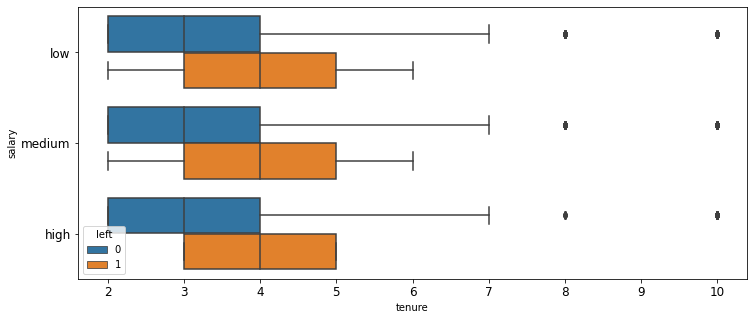

In [22]:
# Create a boxplot to visualize distribution of `tenure` and 'salary' considering churn and detect any outliers
plt.figure(figsize=(12,5))
fig.set_title("Tenure VS Salary")
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
sns.boxplot(data=df1, x="tenure", y="salary", hue="left")
plt.show()

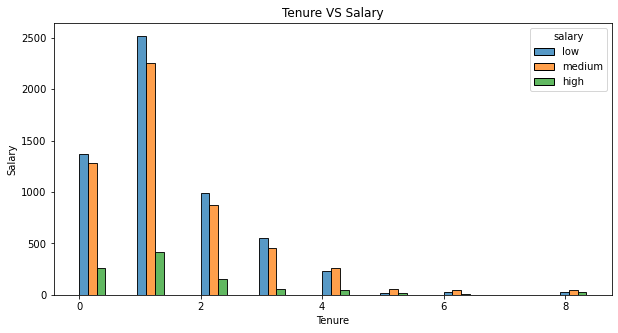

In [23]:
# Create a histogram to visualize `tenure` vs 'salary' considering churn

plt.figure(figsize = (10, 5))
fig = sns.histplot(data=df1, x="tenure", hue="salary", multiple="dodge", shrink=5)
fig.set_xlabel("Tenure")
fig.set_ylabel("Salary")
fig.set_title("Tenure VS Salary")
plt.show()

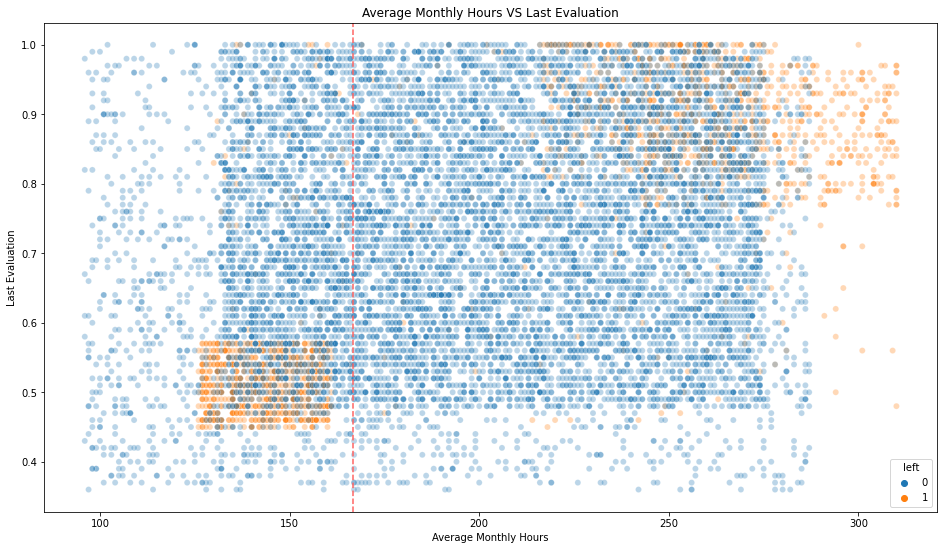

In [24]:
# Create a histogram to visualize `tenure` vs 'salary' considering churn

plt.figure(figsize = (16, 9))
fig=sns.scatterplot(x='average_monthly_hours', y='last_evaluation', data=df1, hue='left',alpha=0.3)
plt.axvline(x=166.67, color='#ff6361', label='166.67 hrs./mo.', ls='--')
fig.set_xlabel("Average Monthly Hours")
fig.set_ylabel("Last Evaluation")
fig.set_title("Average Monthly Hours VS Last Evaluation")
plt.show()

From the provided scatterplot, several key observations emerge:

- The plot suggests the presence of two distinct clusters among departing employees: one comprises high-performing individuals who experienced overwork, while the other involves employees with slightly below-average working hours and lower evaluation scores.

- A discernible correlation appears between the number of hours worked and the corresponding evaluation scores.

- The upper left quadrant of the plot shows a sparse distribution, indicating a scarcity of individuals who both worked extensively and received high evaluation scores. Clearly, prolonged working hours do not necessarily guarantee favorable performance evaluations.

- Predominantly, employees within the company exhibit a tendency to surpass the nominal monthly average of 166.67 hours.

To delve deeper, an examination of whether employees working exceptionally long hours have received promotions in the last five years would provide valuable insights.

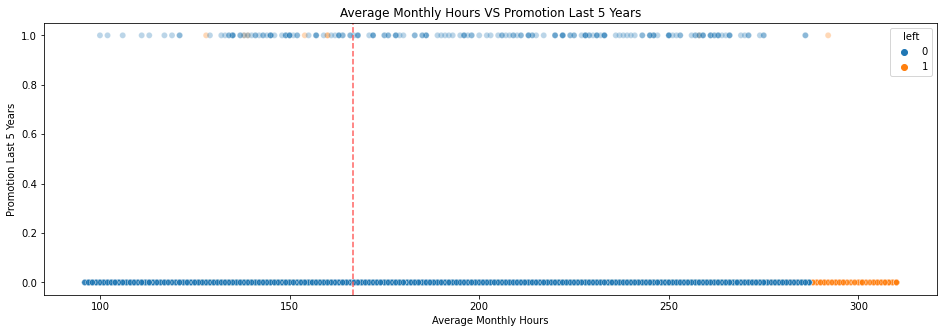

In [25]:
# Create a histogram to visualize `Average Monthly Hours` vs 'Promotion Last 5 Years' considering churn

plt.figure(figsize = (16, 5))

fig=sns.scatterplot(x='average_monthly_hours', y='promotion_last_5years', data=df1, hue='left',alpha=0.3)
plt.axvline(x=166.67, color='#ff6361', label='166.67 hrs./mo.', ls='--')
fig.set_xlabel("Average Monthly Hours")
fig.set_ylabel("Promotion Last 5 Years")
fig.set_title("Average Monthly Hours VS Promotion Last 5 Years")
plt.show()

The presented plot reveals the following insights:

- A minimal number of employees who departed had received promotions in the last five years.
- Employees who worked the most hours also experienced a limited occurrence of promotions.
- Notably, all departing employees were engaged in working the longest hours.

For further analysis, it would be beneficial to examine the distribution of employees who left across different departments.

In [26]:
# Display counts for each department
df1["department"].value_counts()

sales          3239
technical      2244
support        1821
IT              976
RandD           694
product_mng     686
marketing       673
accounting      621
hr              601
management      436
Name: department, dtype: int64

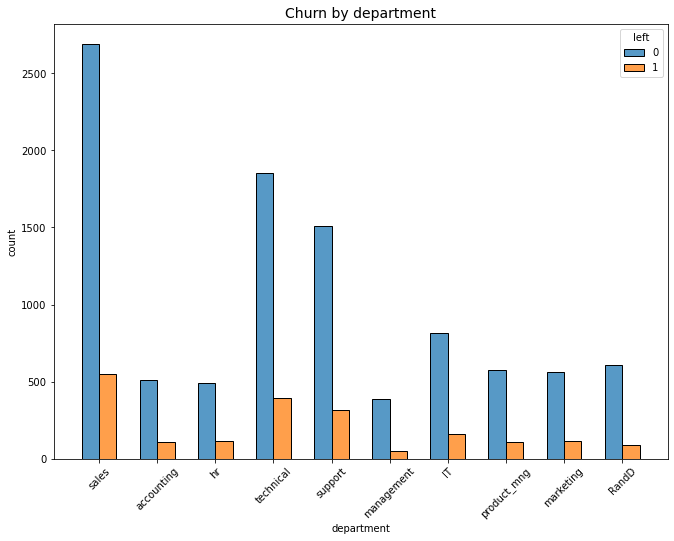

In [27]:
# Create a histogram to visualize 'Churn' by 'deparment'

plt.figure(figsize=(11,8))

fig = sns.histplot(data=df1, x="department", hue="left", multiple="dodge", shrink=0.6)
fig.set_xlabel("department")
plt.xticks(rotation='45')
fig.set_ylabel("count")
plt.title('Churn by department', fontsize=14);
plt.show()

6

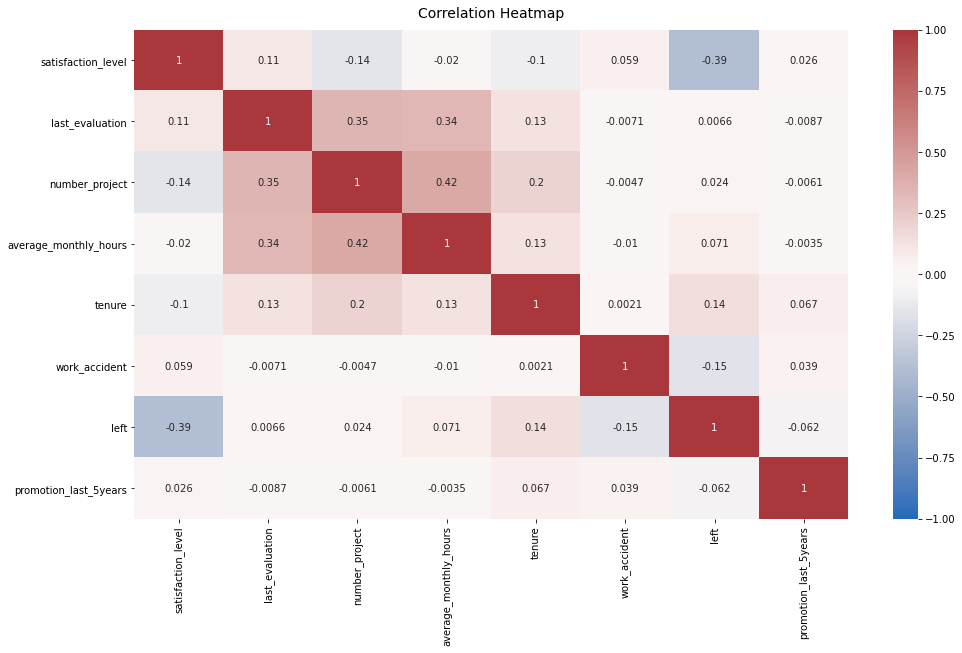

In [28]:
# Plot a correlation heatmap
plt.figure(figsize=(16, 9))
heatmap = sns.heatmap(df.corr(), vmin=-1, vmax=1, annot=True, cmap=sns.color_palette("vlag", as_cmap=True))
heatmap.set_title('Correlation Heatmap', fontdict={'fontsize':14}, pad=12);

The correlation heatmap confirms that the number of projects, monthly hours, and evaluation scores all have some positive correlation with each other, and whether an employee leaves is negatively correlated with their satisfaction level.

### Insights

The departure of employees seems to be correlated with issues in management, manifested through extended working hours, a high number of projects, and generally lower satisfaction levels. The lack of promotions and favorable evaluations for those putting in prolonged work hours likely contributes to a substantial group experiencing burnout. Interestingly, individuals who have spent more than six years at the company exhibit a tendency to stay rather than leave.

# paCe: Construct Stage
- Determine which models are most appropriate
- Construct the model
- Confirm model assumptions
- Evaluate model results to determine how well your model fits the data


🔎
## Recall model assumptions

**Logistic Regression model assumptions**
- Outcome variable is categorical
- Observations are independent of each other
- No severe multicollinearity among X variables
- No extreme outliers
- Linear relationship between each X variable and the logit of the outcome variable
- Sufficiently large sample size





### Reflect on these questions as you complete the constructing stage.

- Do you notice anything odd?
- Which independent variables did you choose for the model and why?
- Are each of the assumptions met?
- How well does your model fit the data?
- Can you improve it? Is there anything you would change about the model?
- What resources do you find yourself using as you complete this stage? (Make sure to include the links.)
- Do you have any ethical considerations in this stage?



[Double-click to enter your responses here.]

## Step 3. Model Building, Step 4. Results and Evaluation
- Fit a model that predicts the outcome variable using two or more independent variables
- Check model assumptions
- Evaluate the model

### Identify the type of prediction task.

Goal is to predict whether an employee leaves the company, which is a categorical outcome variable. So this task involves classification. More specifically, this involves binary classification, since the outcome variable `left` can be either 1 (indicating employee left) or 0 (indicating employee didn't leave). 

### Identify the types of models most appropriate for this task.

Since the variable we want to predict (whether an employee leaves the company) is categorical, we could either build a Logistic Regression model, or a Tree-based Machine Learning model.

### Modeling

### Logistic Regression Model ###
Note that binomial logistic regression suits the task because it involves binary classification.

Before splitting the data, encode the non-numeric variables. There are two: `department` and `salary`. 

`department` is a categorical variable, which means you can dummy it for modeling. 

`salary` is categorical too, but it's ordinal. There's a hierarchy to the categories, so it's better not to dummy this column, but rather to convert the levels to numbers, 0&ndash;2.

In [29]:
# Copy the dataframe
df_enc = df1.copy()

# Encode the `salary` column as an ordinal numeric category
df_enc['salary'] = (
    df_enc['salary'].astype('category')
    .cat.set_categories(['low', 'medium', 'high'])
    .cat.codes
)

# Dummy encode the `department` column
df_enc = pd.get_dummies(df_enc, drop_first=False)

# Display the new dataframe
df_enc.head()

,satisfaction_level,last_evaluation,number_project,average_monthly_hours,tenure,work_accident,left,promotion_last_5years,salary,department_IT,department_RandD,department_accounting,department_hr,department_management,department_marketing,department_product_mng,department_sales,department_support,department_technical
0,0.38,0.53,2,157,3,0,1,0,0,0,0,0,0,0,0,0,1,0,0
1,0.80,0.86,5,262,6,0,1,0,1,0,0,0,0,0,0,0,1,0,0
2,0.11,0.88,7,272,4,0,1,0,1,0,0,0,0,0,0,0,1,0,0
3,0.72,0.87,5,223,5,0,1,0,0,0,0,0,0,0,0,0,1,0,0
4,0.37,0.52,2,159,3,0,1,0,0,0,0,0,0,0,0,0,1,0,0


Create a heatmap to visualize how correlated variables are. Consider which variables you're interested in examining correlations between.

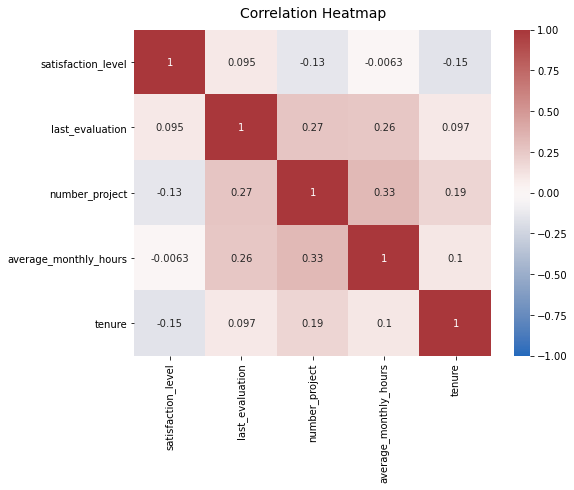

In [30]:
# Plot a correlation heatmap
plt.figure(figsize=(8, 6))
heatmap = sns.heatmap(df_enc[['satisfaction_level','last_evaluation','number_project','average_monthly_hours','tenure']].corr(), vmin=-1, vmax=1, annot=True, cmap=sns.color_palette("vlag", as_cmap=True))
heatmap.set_title('Correlation Heatmap', fontdict={'fontsize':14}, pad=12);

Create a stacked bart plot to visualize number of employees across department, comparing those who left with those who didn't.

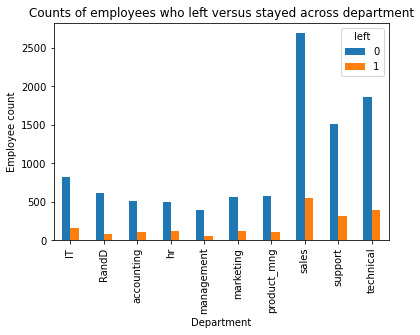

In [31]:
# Create a stacked bart plot to visualize number of employees across department, comparing those who left with those who didn't
# In the legend, 0 (purple color) represents employees who did not leave, 1 (red color) represents employees who left
pd.crosstab(df1['department'], df1['left']).plot(kind ='bar')
plt.title('Counts of employees who left versus stayed across department')
plt.ylabel('Employee count')
plt.xlabel('Department')
plt.show()

Since logistic regression is quite sensitive to outliers, it would be a good idea at this stage to remove the outliers in the `tenure` column that were identified earlier.

In [32]:
#filtering the data without outlier
df2 = df_enc[(df_enc['tenure'] >= lower_limit) & (df_enc['tenure'] <= upper_limit)]

df2.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 11167 entries, 0 to 11999
Data columns (total 19 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   satisfaction_level      11167 non-null  float64
 1   last_evaluation         11167 non-null  float64
 2   number_project          11167 non-null  int64  
 3   average_monthly_hours   11167 non-null  int64  
 4   tenure                  11167 non-null  int64  
 5   work_accident           11167 non-null  int64  
 6   left                    11167 non-null  int64  
 7   promotion_last_5years   11167 non-null  int64  
 8   salary                  11167 non-null  int8   
 9   department_IT           11167 non-null  uint8  
 10  department_RandD        11167 non-null  uint8  
 11  department_accounting   11167 non-null  uint8  
 12  department_hr           11167 non-null  uint8  
 13  department_management   11167 non-null  uint8  
 14  department_marketing    11167 non-null

In [33]:
# Save X and y data into variables
y = df2["left"]
y.head()

0    1
2    1
3    1
4    1
5    1
Name: left, dtype: int64

In [34]:
# Save X and y data into variables
X = df2.drop('left', axis=1)
X.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 11167 entries, 0 to 11999
Data columns (total 18 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   satisfaction_level      11167 non-null  float64
 1   last_evaluation         11167 non-null  float64
 2   number_project          11167 non-null  int64  
 3   average_monthly_hours   11167 non-null  int64  
 4   tenure                  11167 non-null  int64  
 5   work_accident           11167 non-null  int64  
 6   promotion_last_5years   11167 non-null  int64  
 7   salary                  11167 non-null  int8   
 8   department_IT           11167 non-null  uint8  
 9   department_RandD        11167 non-null  uint8  
 10  department_accounting   11167 non-null  uint8  
 11  department_hr           11167 non-null  uint8  
 12  department_management   11167 non-null  uint8  
 13  department_marketing    11167 non-null  uint8  
 14  department_product_mng  11167 non-null

In [35]:
# Split dataset into training and testing set
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.25,stratify=y, random_state=42)

In [36]:
clf = LogisticRegression(random_state=42, max_iter=500).fit(X_train, y_train)

In [37]:
# Save predictions
y_pred = clf.predict(X_test)

In [38]:
# Print out the predicted labels
clf.predict(X_test)

array([0, 0, 0, ..., 0, 0, 0], dtype=int64)

In [39]:
# Print out the predicted probabilities
clf.predict_proba(X_test)[::,-1]

array([0.02152469, 0.03817429, 0.048558  , ..., 0.18504848, 0.03821234,
       0.39450492])

In [40]:
# Calculate the values for each quadrant in the confusion matrix
cm = metrics.confusion_matrix(y_test, y_pred, labels = clf.classes_)

In [41]:
# Create the confusion matrix as a visualization
disp = metrics.ConfusionMatrixDisplay(confusion_matrix = cm,display_labels = clf.classes_)

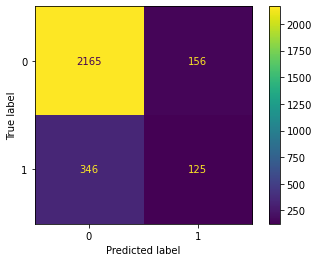

In [42]:
# Display the confusion matrix

# Plot confusion matrix
disp.plot(values_format='')

# Display plot
plt.show()

# observation

1. Upper Left True negative 
2165 employees stayed and model also predicted them right 
2. Upper Right False positive
156 employee stayed and that is False 
3. Lower Left False negative
346 employees left and that is False
4. Lower Right True positive
125 employees left and model also predicted them right 

In [43]:
df2['left'].value_counts(normalize=True)

0    0.831468
1    0.168532
Name: left, dtype: float64

In [44]:
print("Accuracy:", "%.2f" % metrics.accuracy_score(y_test, y_pred))
print("Precision:", "%.2f" % metrics.precision_score(y_test, y_pred))
print("Recall:", "%.2f" % metrics.recall_score(y_test, y_pred))
print("F1 Score:", "%.2f" % metrics.f1_score(y_test, y_pred))

Accuracy: 0.82
Precision: 0.44
Recall: 0.27
F1 Score: 0.33


In [45]:
# Create classification report for logistic regression model
target_names = ['Predicted would not leave', 'Predicted would leave']
print(metrics.classification_report(y_test, y_pred, target_names=target_names))

                           precision    recall  f1-score   support

Predicted would not leave       0.86      0.93      0.90      2321
    Predicted would leave       0.44      0.27      0.33       471

                 accuracy                           0.82      2792
                macro avg       0.65      0.60      0.61      2792
             weighted avg       0.79      0.82      0.80      2792



# Logistic Regression Model Observation 

- **Precision:** The model's accuracy in identifying employees who left the company out of all predicted departures is 44%.
- **Recall:** The model correctly identified 26% of employees who left, out of all employees who actually left.
- **Accuracy:** Overall accuracy is 82%, but precision and recall provide more insightful measures.
- **F1-Score:** The model's balanced performance metric combining precision and recall is 33%.

In summary, the model, while showing high accuracy, may benefit from improvements in correctly identifying employees who left the company, as indicated by lower precision and recall values.

# Logistic Regression Model Observation all weighted averages

- **Precision:** The model achieves 79% accuracy in correctly identifying employees who left the company out of all predicted departures.
- **Recall:** The model demonstrates 82% accuracy in identifying employees who left the company out of all employees who actually left.
- **Accuracy:** Overall accuracy remains at 82%.
- **F1-Score:** The F1-Score, a balanced metric, is at 80%.

In summary, the model performs well across precision, recall, accuracy, and F1-Score, with consistent and balanced results.

# pacE: Execute Stage
- Interpret model performance and results
- Share actionable steps with stakeholders



✏
## Recall evaluation metrics

- **Precision** measures the proportion of data points predicted as True that are actually True, in other words, the proportion of positive predictions that are true positives.
- **Recall** measures the proportion of data points that are predicted as True, out of all the data points that are actually True. In other words, it measures the proportion of positives that are correctly classified.
- **Accuracy** measures the proportion of data points that are correctly classified.
- **F1-score** is an aggregation of precision and recall.






## Step 4. Results and Evaluation
- Interpret model
- Evaluate model performance using metrics
- Prepare results, visualizations, and actionable steps to share with stakeholders




### Summary of model results

**Logistic Regression**

The logistic regression model achieved precision of 79%, recall of 82%, f1-score of 80% (all weighted averages), and accuracy of 82%, on the test set.

### Conclusion, Recommendations, Next Steps

Models and feature importance analysis confirm employee overwork. To retain employees:

- Cap projects per employee.
- Promote those with 4+ years or investigate their dissatisfaction.
- Reward long hours or eliminate the requirement.
- Inform about overtime pay policies and clarify workload expectations.
- Conduct discussions to address overall work culture.
- Revise evaluation scales for proportional recognition.

### Next steps:

- Assess predictions without last_evaluation to address data leakage concerns.
- Explore predicting performance scores if evaluations impact retention.
- Consider the same approach for satisfaction scores.